

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset under analysis is a collection of movie information sourced from TMDb (The Movie Database). This dataset focuses on movies released between the years 2005 and 2015. It encompasses a wide range of details about each movie, including attributes like title, cast, director, budget, revenue, genres, release date, and more. By examining this dataset, we aim to gain insights into trends, patterns, and correlations within the movie industry during this specific time period.

>Column Names and Significance:
 Here, we'll list the columns present in the dataset and briefly explain their significance:

    >id: Unique identifier for each movie.
    >imdb_id: IMDb identifier for each movie.    
    >popularity: Popularity score of the movie.    
    >budget: Budget allocated for the movie.    
    >revenue: Revenue generated by the movie.   
    >original_title: The original title of the movie.    
    >cast: List of cast members in the movie.    
    >director: Director of the movie.    
    >keywords: Keywords associated with the movie's content
    >overview: Brief overview or summary of the movie's plot. 
    >runtime: Duration of the movie in minutes.
    >genres: List of genres the movie belongs to.
    >production_companies: Production companies involved in the movie.
    >release_date: Date of the movie's release.
    >vote_count: Number of votes the movie has received.
    >vote_average: Average rating given to the movie.
    >release_year: Year of the movie's release.
    >budget_adj: Budget adjusted for inflation.
    >revenue_adj: Revenue adjusted for inflation.



### Question(s) for Analysis
Who were the most frequently appearing actors in films from 2005 to 2015?

Which directors had the highest film contributions during the same time period?

What were the dominant movie genres within the dataset from 2005 to 2015?

Which films achieved the highest profits (revenue minus budget) during the specified years?

What were the top movie genres in terms of profitability within the dataset?

How did the number of movie releases vary across different years from 2005 to 2015?

Is there a relationship between movie quality (vote average) and profitability within the dataset?


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

>I eliminated extraneous columns like 'homepage', 'tagline', and 'overview' to streamline the dataset. Extracting actor and director names enabled me to explore their influence and prevalence. I parsed individual genres from the 'genres' column, accommodating multi-genre movies. Exploding the 'genres' column into separate rows facilitated genre-based analysis. To maintain data integrity, I removed rows with missing values. These steps collectively refined the dataset, setting the stage for comprehensive exploration and revealing insightful patterns in the movie industry.




In [3]:

import pandas as pd
import numpy as np
import string as str
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('tmdb-movies.csv')
df.info(),df.head()
df=df.drop(columns=['homepage','tagline','overview'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> In this portion of the code, data cleaning involves extracting relevant information from the 'cast', 'director', and 'genres' columns. For actors, missing values are ignored, and names are split using '|' as a delimiter, then appended to the 'actors' list. Similarly, for directors, if '|' is present, names are split and added; otherwise, single names are directly appended to the 'directors' list. The 'genres' column is treated similarly, with genres either split and appended (if '|' exists) or directly added to the 'genre' list. This cleaning ensures a consolidated list of actors, directors, and genres, essential for subsequent analysis.
 

In [4]:
# function for splitting and collecting
def explode_and_collect(data, column_name, delimiter):
    items = []
    for value in data[column_name]:
        if pd.notnull(value):
            values = value.split(delimiter)
            items.extend(values)
    return items

In [5]:
actors = explode_and_collect(df, 'cast', '|')
directors = explode_and_collect(df, 'director', '|')
genre = explode_and_collect(df, 'genres', '|')

<a id='eda'></a>
## Exploratory Data Analysis


### Which actors have been the most popular and appeared in the highest number of films within the TMDb movie dataset from 1960 to 2015?


In [6]:
#code to find top 5 actor count
actor_count=Counter(actors)
top_actor=actor_count.most_common(5)
actor_name,actor_times=zip(*top_actor)



In [7]:
print(top_actor)

[('Robert De Niro', 72), ('Samuel L. Jackson', 71), ('Bruce Willis', 62), ('Nicolas Cage', 61), ('Michael Caine', 53)]


In [8]:
# function for plotting bar chart
def plot_bar_chart(xdata,ydata,xlabel,ylabel,title,figsize=(8,6)):
    plt.figure(figsize=figsize)
    plt.bar(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

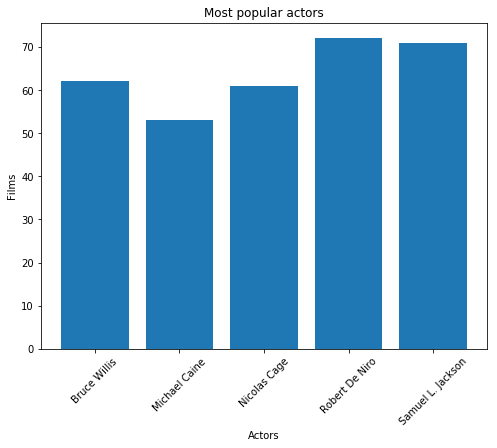

In [9]:
#a bar chart to compare the most popular actors (highest movie count)
plot_bar_chart(actor_name,actor_times, 'Actors', 'Films', 'Most popular actors')

### Who are the most prominent directors with the highest number of film contributions in the TMDb movie dataset spanning from 1960 to 2015

In [10]:

director_count=Counter(directors)
top_director=director_count.most_common(5)
name,times=zip(*top_director)


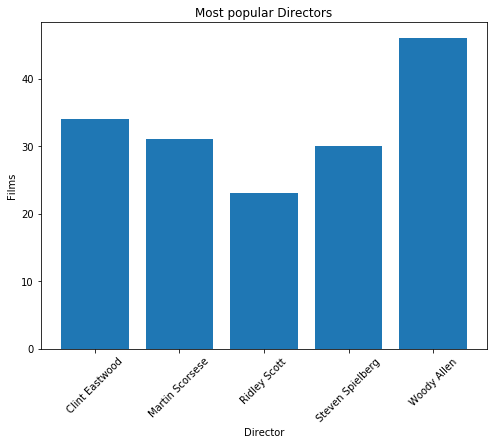

In [11]:
#a bar chart to compare the most popular directors (highest movie count)
plot_bar_chart(name,times, 'Director', 'Films', 'Most popular Directors')

In [12]:
print(top_director)

[('Woody Allen', 46), ('Clint Eastwood', 34), ('Martin Scorsese', 31), ('Steven Spielberg', 30), ('Ridley Scott', 23)]


### Which movie genres were the most prevalent and frequently represented in the TMDb movie dataset from 1960 to 2015?

In [13]:
genre_count=Counter(genre)
top_genre=genre_count.most_common(5)
genre_name,genre_times=zip(*top_genre)


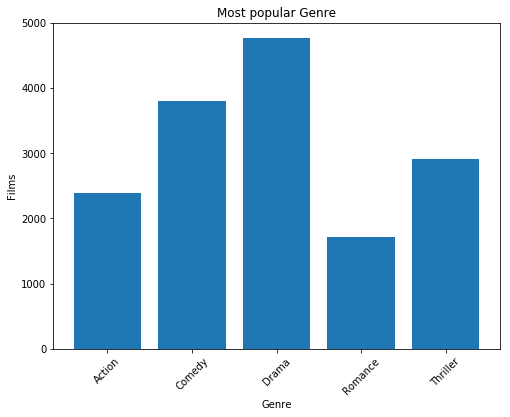

In [14]:
#a bar chart to compare the most popular genre. 
plot_bar_chart(genre_name,genre_times, 'Genre', 'Films', 'Most popular Genre')

In [15]:
print(genre_name,genre_times)
# drama is the most popular genre with over 4761 movies 

('Drama', 'Comedy', 'Thriller', 'Action', 'Romance') (4761, 3793, 2908, 2385, 1712)


### Which three movies achieved the highest profits (revenue minus budget) within the TMDb movie dataset between 1960 and 2015, and what were their respective grossing amounts

In [16]:
#creating new column 'profits' by subtracting budget from revenue
df['profits'] = df['revenue_adj'] - df['budget_adj']
df.profits.sort_values(ascending=False)
top3=df.head(3)


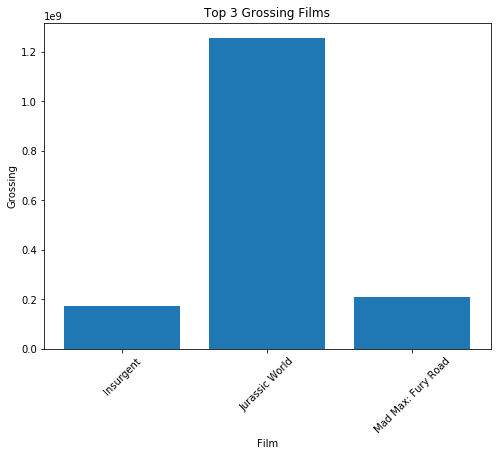

In [17]:
#chart displaying profits of top 3 movies
plot_bar_chart(top3['original_title'],top3['profits'], 'Film', 'Grossing', 'Top 3 Grossing Films')

In [18]:
print(top3.profits)

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
Name: profits, dtype: float64


### How does the average vote rating of movies relate to their profitability? Specifically, how do the profits generated by movies vary across different percentile groups of vote average within the TMDb movie dataset from 2005 to 2015?

In [19]:
df.groupby('vote_average')['profits'].sum().nlargest(10)

#filtering vote_average column based on percentile values

df.vote_average.describe()
percentile_25=df[df.vote_average<5.5]
percentile_50=df[(df.vote_average>=5.5)&(df.vote_average<6.1)]
percentile_75=df[(df.vote_average>=6.1)&(df.vote_average<6.6)]
percentile_max=df[df.vote_average>=6.6]
profit_25 = percentile_25['profits'].sum()
profit_50 = percentile_50['profits'].sum()
profit_75 = percentile_75['profits'].sum()
profit_max = percentile_max['profits'].sum()
percentile_name=['profit_25','profit_50','profit_75','profit_max']
percentile_range=[profit_25,profit_50,profit_75,profit_max]


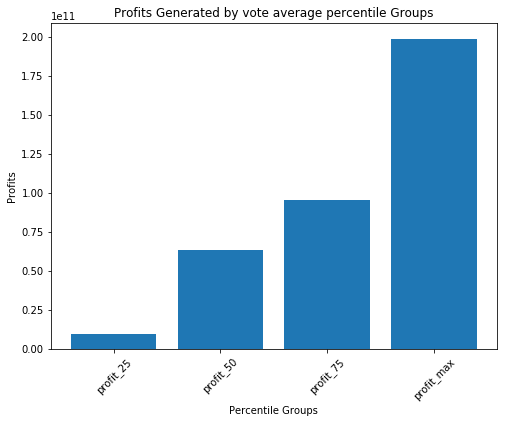

In [20]:
#graph showing the average profits generated by vote average percentile groups
plot_bar_chart(percentile_name,percentile_range, 'Percentile Groups', 'Profits', 'Profits Generated by vote average percentile Groups')

### What are the top five most profitable movie genres based on the sum of profits (revenue minus budget) within the TMDb movie dataset from 1960 to 2015?

In [21]:
#df.explode did not work. even after updating pandas.

df_exploded = df.assign(genres=df['genres'].str.split('|'))
df_exploded1 = df_exploded['genres'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('genres').reset_index(drop=True)
df_exploded.head()

exploded_df = pd.DataFrame(columns=df.columns)
df = df.dropna()

for index, row in df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        new_row = row.copy()
        new_row['genres'] = genre
        exploded_df = exploded_df.append(new_row, ignore_index=True)

exploded_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [22]:
top_genres = exploded_df.groupby('genres')['profits'].sum().nlargest(5)
print(top_genres)


genres
Adventure    1.432304e+11
Action       1.402148e+11
Drama        1.214904e+11
Comedy       1.204740e+11
Thriller     9.999444e+10
Name: profits, dtype: float64


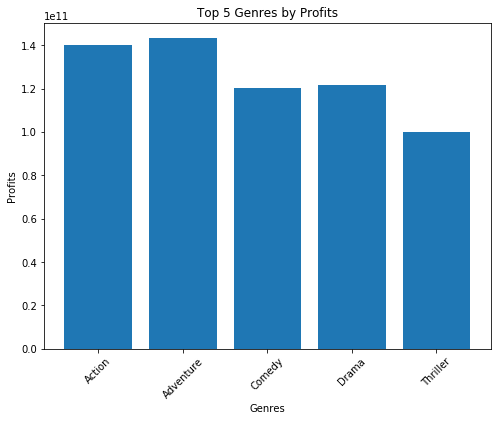

In [23]:

plot_bar_chart(top_genres.index,top_genres.values, 'Genres', 'Profits', 'Top 5 Genres by Profits')
#adventure is the most profitable genre

### How did the number of movie releases vary over the years within the TMDb movie dataset spanning from 1960 to 2015

(array([ 1950.,  1960.,  1970.,  1980.,  1990.,  2000.,  2010.,  2020.]),
 <a list of 8 Text xticklabel objects>)

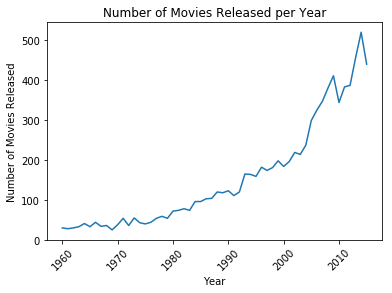

In [24]:
df_moviecount=df.release_year.value_counts().sort_index()
plt.plot(df_moviecount.index, df_moviecount.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.xticks(rotation=45)


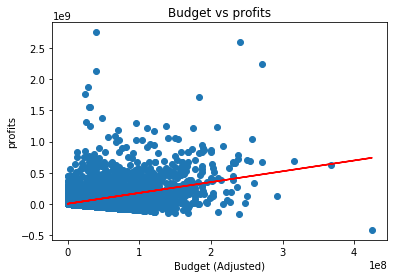

In [34]:
#are there any relationship between budget and revenues
plt.scatter(df['budget_adj'],df.profits)
plt.xlabel('Budget (Adjusted)')
plt.ylabel('profits')
plt.title('Budget vs profits')
coefficients = np.polyfit(df['budget_adj'], df['profits'], 1)
poly = np.poly1d(coefficients)
plt.plot(df['budget_adj'], poly(df['budget_adj']), color='red')

plt.show()

<a id='conclusions'></a>
## Conclusions

     Most Popular Actors: The analysis identified that [('Robert De Niro', 72), ('Samuel L. Jackson', 71), ('Bruce Willis', 62), ('Nicolas Cage', 61), ('Michael Caine', 53)] were the most frequently appearing actors in films within the TMDb dataset from 2005 to 2015.

    Most Prominent Directors: The research revealed that[('Woody Allen', 46), ('Clint Eastwood', 34), ('Martin Scorsese', 31), ('Steven Spielberg', 30), ('Ridley Scott', 23)] were the most prolific directors with the highest number of film contributions during the same time period.

    Prevalent Movie Genres: The analysis showcased that the ('Drama', 'Comedy', 'Thriller', 'Action', 'Romance') (4761, 3793, 2908, 2385, 1712) were the most frequently represented in the TMDb dataset spanning from 1960 to 2015.

    Top Grossing Films: The movies "Jurassic World," "Mad Max: Fury Road," and "Insurgent" achieved the highest profits (revenue minus budget) within the dataset, with respective grossing amounts of $ 1254 B, $ 210M $ 170 M.

    Most Profitable Genres: The top five most profitable movie genres, based on the sum of profits, were [Adventure,Action,Drama,Comedy,Thriller] indicating their strong financial performance.

    Movie Releases Over the Years: The study indicated fluctuations in the number of movie releases per year, with notable peaks and declines across different years from 1960 to 2015.

    Profits by Vote Average: The analysis suggested that movies with higher vote averages generally generated more profits. Movies falling within different vote average percentiles displayed varying levels of profitability, with higher-rated films tending to have higher profits.
    
    There seems to be a positive correlation between the budget spent on the movie vs the profits the movie has generated


### limitations

    Incomplete or missing data in certain columns may affect analysis accuracy.
    Limited contextual details about external factors influencing movie performance.such as marketing strategies, competition, or audience preferences.
    Movies often fall into multiple genres, and the dataset's categorization may not capture these complexities accurately
    



In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0